# Load Dependencies

# Google Colabにおける環境設定
google colab環境でなければ実行不要

In [ ]:
!pip install rdkit-pypi
!git clone https://github.com/ARIM-Training/Training_python_7.git
%cd Training_python_7

In [1]:
import pandas as pd
import numpy as np
from rdkit import Chem
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
random_seed=2022

# Load Data

In [2]:
df_data=pd.read_excel('./Data/Data.xlsx')
train_num=49
re_1=np.array(df_data)[:train_num,1]
re_2=np.array(df_data)[:train_num,2]
set1=np.array(df_data)[:train_num,3]
set2=np.array(df_data)[:train_num,4]
ratio=np.array(df_data)[:train_num,8]
des_all=np.array(df_data)[:train_num,9:]
ratio_log=np.array([np.log(i) for i in ratio])
des_max=des_all[:train_num,:].max(axis=0)
des_min=des_all[:train_num,:].min(axis=0)
des_all_std=(des_all-des_min)/(des_max-des_min)
smiles_set_map_df = pd.read_csv('./Data/re_1_smiles_set_dict.csv')
smiles_set_map={str(smi):[a,b,c,d] for smi,a,b,c,d in zip(smiles_set_map_df['SMILES'].to_list(),
                                              smiles_set_map_df['1'].to_list(),smiles_set_map_df['2'].to_list(),
                                              smiles_set_map_df['3'].to_list(),smiles_set_map_df['4'].to_list())} 
re_1_set=set(re_1)

# OOS Prediction

In [3]:
e=2.718281828459
pred_value=[]
exp_value=[]
smi2=[]
pred_value2=[]
exp_value2=[]
smi3=[]
pred_value3=[]
exp_value3=[]
mul_smi=[]
pred_valuemul=[]
exp_valuemul=[]

for tem_re_1 in re_1_set:

    train_index=[]
    test_index=[]
    test_detail=[]
    for index,tem_re1 in enumerate(re_1):
        if tem_re1==tem_re_1:
            test_index.append(index)
            test_detail.append([set1[index],set2[index]])
        else:
            train_index.append(index)

    sel_index = [9, 11, 5, 25, 26, 18, 17, 16, 21, 15, 13, 24, 8, 19, 2]
    des_sel=des_all_std[:train_num,sel_index]
    model =  ExtraTreesRegressor(random_state=random_seed,n_jobs=60)
    all_r2 = []
    all_pearsr = []
    all_mae = []
    repeat_pred = []
    repeat_test = []
    for i in range(50):
        train_x,test_x = des_sel[train_index],des_sel[test_index]
        train_y,test_y = ratio_log[train_index],ratio_log[test_index] 
        model.fit(train_x,train_y)
        test_pred = model.predict(test_x)
        repeat_pred.append(test_pred)
        repeat_test.append(test_y)
    repeat_pred=np.mean(np.array(repeat_pred),axis=0)   
    repeat_test=np.mean(np.array(repeat_test),axis=0) 
    pred_value.append(np.round((repeat_pred),3))
    exp_value.append(np.round(repeat_test,3))
    tem_test=np.round(e**repeat_test,3)
    tem_pred=np.round((e**repeat_pred),3)

    print('molecule: ',tem_re_1,'\n',
          '  site:  ',test_detail,'\n',
          '  exp.:  ',tem_test,'\n',
          '  pred.:  ',tem_pred,'\n')
    if len(test_detail)==1:
        pred_value2.append(tem_pred)
        exp_value2.append(tem_test)  
        smi2.append(tem_re_1)
    elif len(test_detail)==3:
        pred_value3.append(tem_pred)
        exp_value3.append(tem_test)
        smi3.append(tem_re_1)
    else:
        pred_valuemul.append(tem_pred)
        exp_valuemul.append(tem_test)
        mul_smi.append(tem_re_1)

molecule:  C12=CC=CC=C1C3=C(C=CC=C3)O2 
   site:   [[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]] 
   exp.:   [8.5   3.269 1.735 0.385 0.204 0.531] 
   pred.:   [2.466 1.545 2.308 2.034 3.066 1.248] 

molecule:  CC1=CC=CC=C1C 
   site:   [[0, 1]] 
   exp.:   [0.625] 
   pred.:   [0.697] 

molecule:  ClC1=CC=C(C)C=C1 
   site:   [[0, 1]] 
   exp.:   [0.435] 
   pred.:   [1.313] 

molecule:  CC(C1=CC=CC=C1)(C)C 
   site:   [[1, 2]] 
   exp.:   [1.] 
   pred.:   [1.203] 

molecule:  CC1=CC=CC(C)=C1 
   site:   [[0, 1], [0, 2], [1, 2]] 
   exp.:   [0.182 1.6   8.8  ] 
   pred.:   [0.437 1.159 5.003] 

molecule:  COC1=CC=CC=C1 
   site:   [[0, 2]] 
   exp.:   [16.] 
   pred.:   [14.199] 

molecule:  ClC1=CC=CC=C1 
   site:   [[0, 1], [0, 2], [1, 2]] 
   exp.:   [3.083 3.7   1.2  ] 
   pred.:   [2.085 2.013 0.935] 

molecule:  CC([Si](OC1=CC=CC=C1)(C(C)C)C(C)C)C 
   site:   [[0, 2]] 
   exp.:   [1.] 
   pred.:   [1.475] 

molecule:  CCOC1=CC=CC=C1 
   site:   [[0, 2]] 
   exp.:   [20.] 
  

# Results

## Two Sites

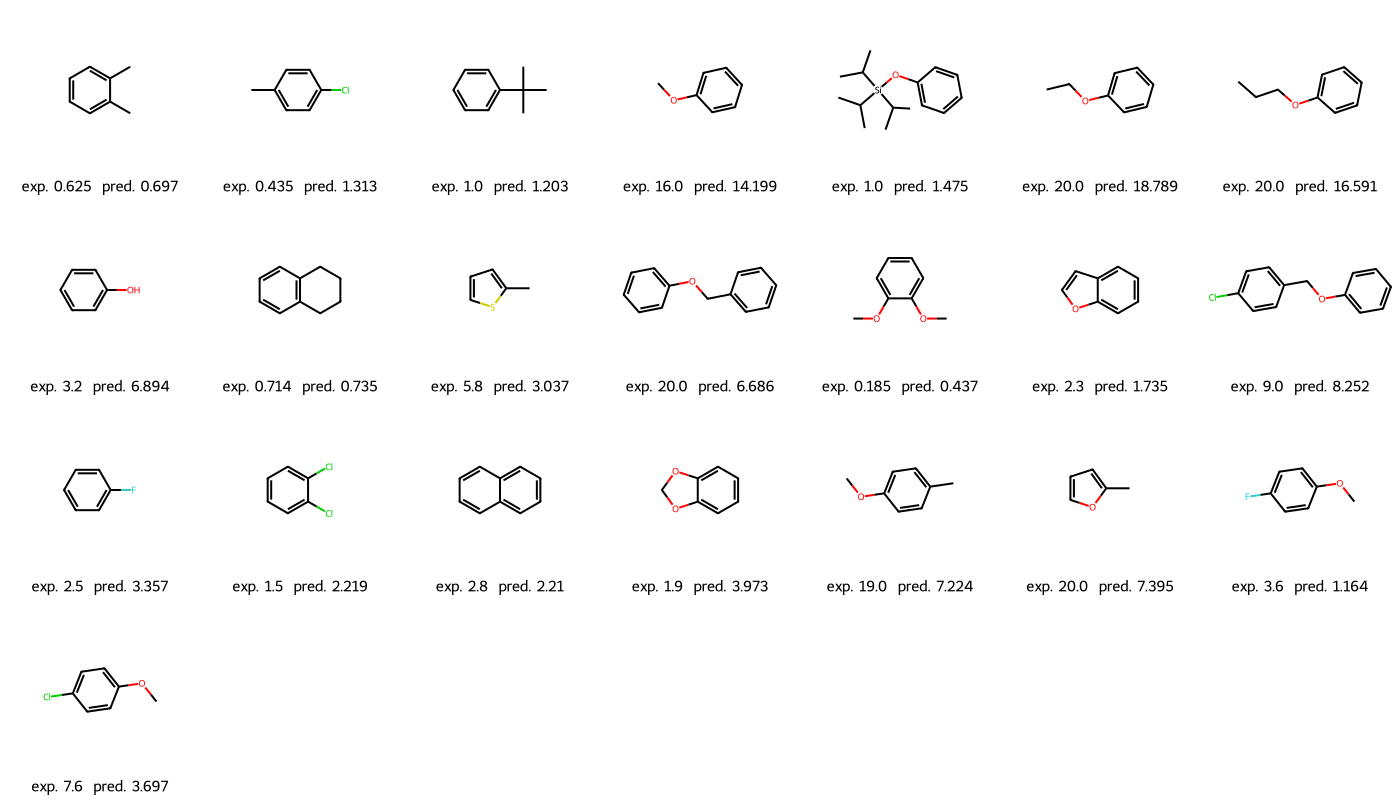

<Figure size 6000x5000 with 0 Axes>

In [4]:
mol2=[]
for index,i in enumerate(smi2):
     mol2.append(Chem.MolFromSmiles(i))
        
fig = plt.figure(figsize=(60,50))
Chem.Draw.MolsToGridImage(mol2,molsPerRow=7,subImgSize=(200,200),
                          legends=['exp. '+str(tem_exp[0])+'  pred. '+str(tem_pred[0]) for tem_exp,tem_pred in zip(exp_value2,pred_value2)])

## Three Sites

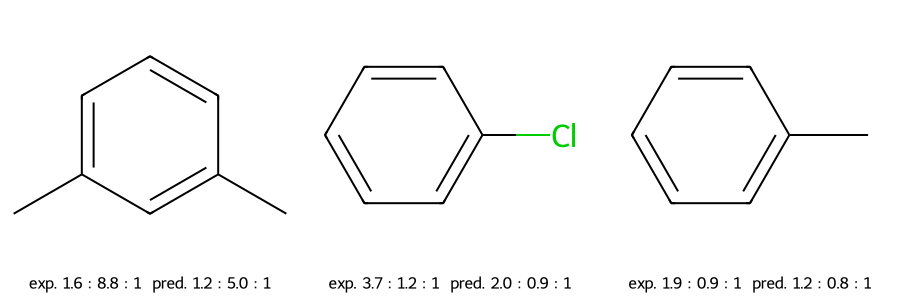

<Figure size 6000x5000 with 0 Axes>

In [5]:
mol3=[]
for index,i in enumerate(smi3):
     mol3.append(Chem.MolFromSmiles(i))
        
fig = plt.figure(figsize=(60,50))
Chem.Draw.MolsToGridImage(mol3,molsPerRow=3,subImgSize=(300,300),
                          legends=['exp. '+str(tem_exp[1])+str(' : ')+str(tem_exp[2])+str(' : ')+str(1)+'  pred. '+str(tem_pred[1])+str(' : ')+str(tem_pred[2])+str(' : ')+str(1) for tem_exp,tem_pred in zip(np.round(exp_value3,1),np.round(pred_value3,1))])

#　次回  
https://colab.research.google.com/github/ARIM-Training/Training_python_7/blob/main/Notebook3_external_prediction.ipynb